# MAKE TRADING BARS - 5TH PROJECT FROM THE ALPHA QUANT PROGRAM

In [1]:
from MakeTradingBars import *
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
import mplfinance as mpf
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
start_year = 2014
years = [str(start_year+i) for i in range(15)]
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10","11", "12"]
days = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10",
        "11", "12", "13", "14", "15", "16", "17", "18", "19", "20",
        "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]

In [3]:
# Extract all
folder_path = f"../../../DATA/EURUSD-Z-Admiral-Markets-clean-test"

# Extract all path IN THE GOOD ORDER 
# Be sure you do not the 1th January 2024 before the 15 March 2023 for example
paths = []

for year in years:
    for month in months:
        for day in days:
            try:
                path = folder_path + f"/{year}/{month}/{day}.parquet"
                df = pd.read_parquet(path)
                paths.append(path)
            except:
                pass    

In [4]:
# Extract all the ticks file in a list
dfs = []

for path in paths:
    df = pd.read_parquet(path)
    dfs.append(df)

In [5]:
# As we didn't keep the duplicate values, we can create one big dataframe now, it will be easier
dft = pd.concat(dfs,axis=0)

# Last verification to be sure we have a chronological order in the ticks
dft = dft.sort_index()

# Add the volume = 0 because we do not have a volume columns and index = 0 columns to compute the slippage easier 
dft["volume"] = 0
dft["index"] = range(len(dft))

# FIX TIME BARS

In [6]:
# Class initialization
MTB = MakeTradingBars(dft)

# Create TIME BARS
MTB.time_bars_building("240T")
bars_chunk = MTB.time_bars

bars_chunk.to_csv("Bars/EURUSD-4H-Time_bars.csv")

In [7]:
bars_chunk

,open,high,low,close,volume,high_time,low_time,first_index,first_time,open_bid_slippage,open_ask_slippage
time,,,,,,,,,,,
2014-01-01 20:00:00+00:00,1.077780,1.377435,1.374100,1.376715,0,2014-01-01 23:19:22+00:00,2014-01-01 22:14:34+00:00,0.0,2014-01-01 22:07:01+00:00,1.07773,1.07783
2014-01-02 00:00:00+00:00,1.376570,1.377520,1.375070,1.376685,0,2014-01-02 03:12:44+00:00,2014-01-02 01:30:34+00:00,820.0,2014-01-02 00:00:00+00:00,1.37654,1.37650
2014-01-02 04:00:00+00:00,1.376685,1.376370,1.372570,1.373215,0,2014-01-02 04:06:07+00:00,2014-01-02 07:54:50+00:00,1965.0,2014-01-02 04:06:07+00:00,1.37666,1.37671
2014-01-02 08:00:00+00:00,1.373180,1.374230,1.368400,1.369080,0,2014-01-02 09:56:57+00:00,2014-01-02 11:27:19+00:00,3664.0,2014-01-02 08:00:00+00:00,1.37321,1.37320
2014-01-02 12:00:00+00:00,1.369080,1.368895,1.362970,1.365405,0,2014-01-02 12:00:02+00:00,2014-01-02 15:40:11+00:00,6371.0,2014-01-02 12:00:02+00:00,1.36906,1.36910
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-16 04:00:00+00:00,1.075995,1.076775,1.075755,1.076060,0,2024-02-16 07:39:14+00:00,2024-02-16 04:23:01+00:00,13408354.0,2024-02-16 04:03:19+00:00,1.07598,1.07601
2024-02-16 08:00:00+00:00,1.076060,1.078005,1.076060,1.077760,0,2024-02-16 11:51:06+00:00,2024-02-16 08:14:27+00:00,13408474.0,2024-02-16 08:05:06+00:00,1.07604,1.07608
2024-02-16 12:00:00+00:00,1.077730,1.077795,1.073205,1.077255,0,2024-02-16 12:01:51+00:00,2024-02-16 13:39:31+00:00,13408822.0,2024-02-16 12:00:00+00:00,1.07773,1.07772


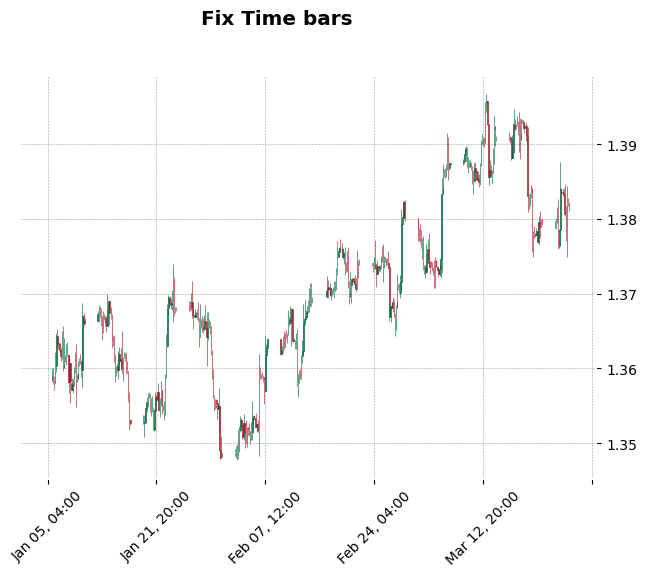

In [8]:
# Plot some bars
df = bars_chunk.iloc[20:500,:]

dates = df.index
open_prices = df["open"]
close_prices = df["close"]
high_prices = df["high"]
low_prices = df["low"]

# Configurer et afficher le graphique en chandeliers
mpf.plot(df, type='candle', style='charles',
         title='Fix Time bars',
         ylabel='',
         volume=False)

# TICK BARS

In [9]:
# Class initialization
MTB = MakeTradingBars(dft)

# Create TICK BARS
MTB.tick_bars_building(500)
bars_chunk_tick = MTB.tick_bars

bars_chunk_tick.to_csv("Bars/EURUSD-500-Ticks_bars.csv")

In [10]:
bars_chunk_tick

,open,high,low,close,volume,high_time,low_time,open_bid_slippage,open_ask_slippage
time,,,,,,,,,
2014-01-01 22:07:01+00:00,1.376005,1.376920,1.374100,1.376920,0,2014-01-01 23:08:58+00:00,2014-01-01 22:14:40+00:00,1.37554,1.37647
2014-01-01 23:08:58+00:00,1.376900,1.377435,1.376270,1.376370,0,2014-01-01 23:19:22+00:00,2014-01-02 00:06:08+00:00,1.37686,1.37696
2014-01-02 00:16:20+00:00,1.376285,1.376600,1.375070,1.375610,0,2014-01-02 00:21:52+00:00,2014-01-02 01:30:35+00:00,1.37632,1.37633
2014-01-02 01:42:22+00:00,1.375620,1.377520,1.375620,1.375745,0,2014-01-02 03:12:44+00:00,2014-01-02 01:42:22+00:00,1.37558,1.37566
2014-01-02 04:15:13+00:00,1.375795,1.375865,1.374450,1.375710,0,2014-01-02 05:56:27+00:00,2014-01-02 05:01:51+00:00,1.37577,1.37577
...,...,...,...,...,...,...,...,...,...
2024-02-16 00:13:05+00:00,1.077130,1.077155,1.075755,1.076840,0,2024-02-16 00:13:44+00:00,2024-02-16 04:23:01+00:00,1.07713,1.07713
2024-02-16 08:41:51+00:00,1.076850,1.078000,1.074455,1.074490,0,2024-02-16 11:51:06+00:00,2024-02-16 13:30:10+00:00,1.07684,1.07685
2024-02-16 13:30:11+00:00,1.074495,1.075020,1.073330,1.073485,0,2024-02-16 13:32:29+00:00,2024-02-16 13:36:18+00:00,1.07468,1.07452


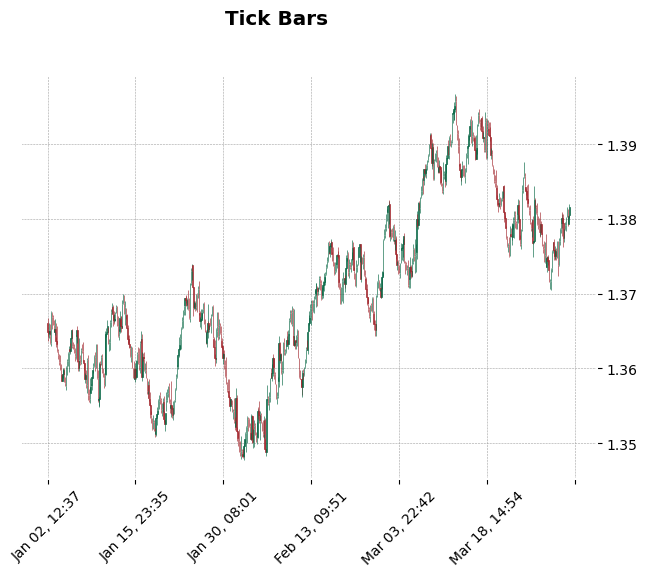

In [11]:
df = bars_chunk_tick.iloc[15:610,:]

# Plot some bars
dates = df.index
open_prices = df["open"]
close_prices = df["close"]
high_prices = df["high"]
low_prices = df["low"]

mpf.plot(df, type='candle', style='charles',
         title='Tick Bars',
         ylabel='',
         volume=False)

# TICKS RUN BARS

In [12]:
# Class initialization
MTB = MakeTradingBars(dft)

# Create TICK RUN BARS
MTB.tick_run_bars_building(50)
bars_chunk_run = MTB.tick_run_bars

bars_chunk_run.to_csv("Bars/EURUSD-50-Tick_run_bars.csv")

In [13]:
bars_chunk_run

,open,high,low,close,volume,number_ticks,high_time,low_time,open_bid_slippage,open_ask_slippage
time,,,,,,,,,,
2014-01-01 22:07:07+00:00,1.375995,1.377435,1.374100,1.377130,0,1779,2014-01-01 23:19:22+00:00,2014-01-01 22:14:40+00:00,1.37552,1.37647
2014-01-02 03:12:24+00:00,1.377135,1.377520,1.372585,1.372670,0,1731,2014-01-02 03:12:44+00:00,2014-01-02 07:54:27+00:00,1.37710,1.37717
2014-01-02 07:54:45+00:00,1.372690,1.373295,1.372000,1.372000,0,402,2014-01-02 08:00:06+00:00,2014-01-02 08:07:54+00:00,1.37266,1.37270
2014-01-02 08:07:55+00:00,1.372030,1.374050,1.371615,1.373925,0,606,2014-01-02 08:44:16+00:00,2014-01-02 08:13:38+00:00,1.37201,1.37200
2014-01-02 08:44:29+00:00,1.374005,1.374230,1.371255,1.371275,0,555,2014-01-02 09:56:57+00:00,2014-01-02 11:01:58+00:00,1.37395,1.37400
...,...,...,...,...,...,...,...,...,...,...
2024-02-13 02:18:42+00:00,1.076430,1.079290,1.075685,1.079280,0,950,2024-02-13 13:09:05+00:00,2024-02-13 09:10:43+00:00,1.07643,1.07641
2024-02-13 13:09:05+00:00,1.079285,1.079675,1.069510,1.077260,0,5430,2024-02-13 13:30:01+00:00,2024-02-14 08:35:37+00:00,1.07930,1.07928
2024-02-15 13:30:29+00:00,1.077235,1.077330,1.075530,1.075530,0,459,2024-02-15 13:30:29+00:00,2024-02-15 13:34:59+00:00,1.07732,1.07706


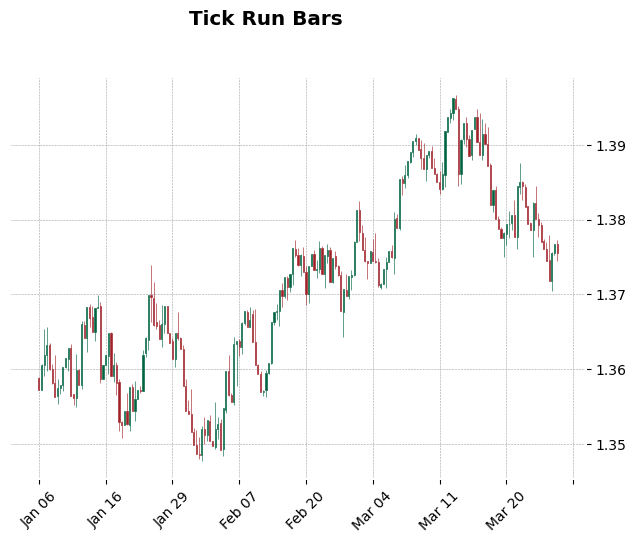

In [14]:
df = bars_chunk_run.iloc[15:210,:]

# Plot some bars
dates = df.index
open_prices = df["open"]
close_prices = df["close"]
high_prices = df["high"]
low_prices = df["low"]

mpf.plot(df, type='candle', style='charles',
         title='Tick Run Bars',
         ylabel='',
         volume=False)

# SAME TICKS, DIFFERENT BARS

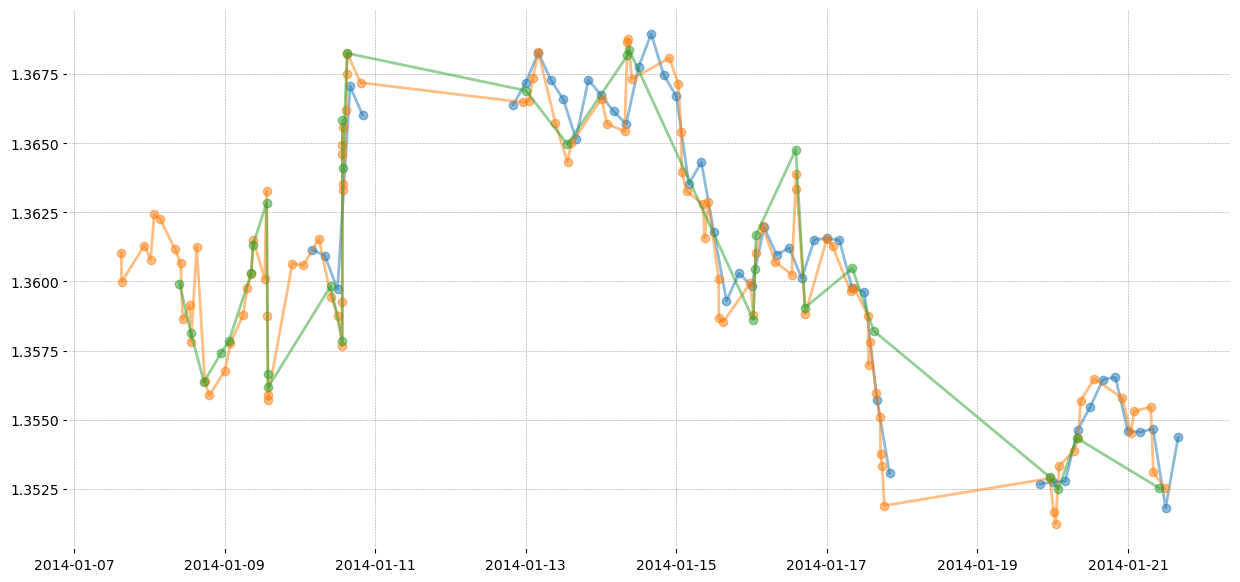

In [15]:
plt.figure(figsize=(15,7))
plt.plot(bars_chunk["open"].iloc[50:120], "o-", alpha=0.5)
plt.plot(bars_chunk_tick["open"].iloc[50:150], "o-", alpha=0.5)
plt.plot(bars_chunk_run["open"].iloc[20:50], "o-", alpha=0.5)